In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf
import seaborn as sns

%matplotlib inline
train_data_org = pd.read_excel('data/Training-Data-Sets.xlsx')
test_data_org = pd.read_excel('data/Test dataset v1.xlsx')

In [2]:
train_data_org.head()


,Day,EQ,Social_Search_Impressions,Social_Search_Working_cost,Digital_Impressions,Digital_Working_cost,Print_Impressions.Ads40,Print_Working_Cost.Ads50,OOH_Impressions,OOH_Working_Cost,...,Magazine_Impressions_pct,TV_GRP,Competitor1_RPI,Competitor2_RPI,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,RPI_Subcategory
0,1,718.458667,22256928,56812,7724107,238700,151438,1044,112229070,2133614,...,54.17,16.46,105.71,36.13,46.36,71.83,5420048,475559,0.3766,45.77
1,2,25.521137,4239408,105695,5844288,188902,264008,113582,284597324,1719318,...,65.79,15.64,111.79,43.31,47.58,67.90,12155631,371540,0.2515,35.02
2,3,268.288044,6708500,87686,13008485,19704,150505,38501,807781054,1569740,...,45.08,23.91,110.15,38.26,49.26,72.70,11939870,225984,0.3679,46.22
3,4,209.071599,36835247,70791,2520814,200111,253458,53719,667441334,922723,...,75.24,13.06,116.74,39.37,44.21,73.01,7045541,551342,0.0504,38.10
4,5,3482.169185,23693467,75610,9276779,65532,278877,95178,74045467,1834970,...,56.85,40.72,115.18,36.85,45.46,75.84,11488805,254143,0.2219,39.16


In [3]:
train_data_org.describe()

,Day,EQ,Social_Search_Impressions,Social_Search_Working_cost,Digital_Impressions,Digital_Working_cost,Print_Impressions.Ads40,Print_Working_Cost.Ads50,OOH_Impressions,OOH_Working_Cost,...,Magazine_Impressions_pct,TV_GRP,Competitor1_RPI,Competitor2_RPI,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,RPI_Subcategory
count,12000.00000,12000.000000,1.200000e+04,12000.000000,1.200000e+04,12000.000000,12000.000000,12000.000000,1.200000e+04,1.200000e+04,...,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,1.200000e+04,12000.000000,12000.000000,12000.000000
mean,6000.50000,638.008496,1.962056e+07,63131.860167,6.663405e+06,218973.240167,194404.538917,95406.492167,4.526812e+08,1.975918e+06,...,50.354613,28.902704,106.173423,38.655960,46.162093,70.641081,6.688170e+06,549685.650917,0.218851,40.159309
std,3464.24595,1200.109675,1.084298e+07,34518.859817,3.824995e+06,124075.882373,85857.419707,55041.846012,2.308381e+08,1.017836e+06,...,16.440054,9.506248,8.229686,3.903151,1.893655,5.081959,3.179592e+06,197373.143664,0.098834,5.129030
min,1.00000,0.019459,8.741110e+05,3546.000000,2.344000e+04,3493.000000,46372.000000,462.000000,5.435061e+07,2.374290e+05,...,21.890000,12.340000,91.900000,31.900000,42.900000,61.900000,1.234920e+06,209473.000000,0.047200,31.230000
25%,3000.75000,57.604317,1.021389e+07,33164.000000,3.330268e+06,112318.250000,120124.750000,47610.000000,2.519760e+08,1.095344e+06,...,36.100000,20.720000,99.030000,35.260000,44.520000,66.290000,3.965402e+06,380095.250000,0.133175,35.730000
50%,6000.50000,210.732487,1.949458e+07,62888.500000,6.715113e+06,218230.500000,193609.500000,95586.000000,4.540579e+08,1.959212e+06,...,50.190000,28.960000,106.150000,38.625000,46.170000,70.670000,6.619380e+06,547465.000000,0.220000,40.200000
75%,9000.25000,665.093566,2.913852e+07,92461.750000,9.956033e+06,326631.250000,268843.750000,143789.750000,6.557911e+08,2.854418e+06,...,64.572500,37.240000,113.282500,42.030000,47.790000,75.030000,9.430345e+06,719804.750000,0.305400,44.560000
max,12000.00000,18557.563795,3.827240e+07,123421.000000,1.323874e+07,432340.000000,342242.000000,190389.000000,8.493609e+08,3.748194e+06,...,78.730000,45.340000,120.440000,45.440000,49.440000,79.440000,1.223400e+07,893820.000000,0.389300,49.020000


## Autocorrelation
Because we are working with timeseries data, we need to know if the target variable is autocorrelated.

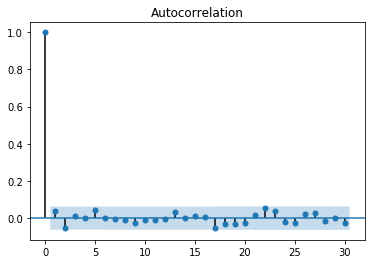

In [4]:
train_data_y = train_data_org['EQ']
plot_acf(train_data_y[:1000])
plt.show()

There seems to be no autocorrelation present. The series also seems to stationary, considering how quickly the plot falls to zero.

Since we how to forecast sales for future time periods, we can create a lag feature EQ_next with the next time period's EQ.

In [5]:
def transform_ts_supervised(dataframe):
    eq = dataframe['EQ']
    
    eq_next = eq.shift(periods=1)
    dataframe['EQ_next']=list(eq_next)
    dataframe=dataframe.dropna()
    return dataframe

train_data = transform_ts_supervised(train_data_org)
train_data.head()

,Day,EQ,Social_Search_Impressions,Social_Search_Working_cost,Digital_Impressions,Digital_Working_cost,Print_Impressions.Ads40,Print_Working_Cost.Ads50,OOH_Impressions,OOH_Working_Cost,...,TV_GRP,Competitor1_RPI,Competitor2_RPI,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,RPI_Subcategory,EQ_next
1,2,25.521137,4239408,105695,5844288,188902,264008,113582,284597324,1719318,...,15.64,111.79,43.31,47.58,67.90,12155631,371540,0.2515,35.02,718.458667
2,3,268.288044,6708500,87686,13008485,19704,150505,38501,807781054,1569740,...,23.91,110.15,38.26,49.26,72.70,11939870,225984,0.3679,46.22,25.521137
3,4,209.071599,36835247,70791,2520814,200111,253458,53719,667441334,922723,...,13.06,116.74,39.37,44.21,73.01,7045541,551342,0.0504,38.10,268.288044
4,5,3482.169185,23693467,75610,9276779,65532,278877,95178,74045467,1834970,...,40.72,115.18,36.85,45.46,75.84,11488805,254143,0.2219,39.16,209.071599
5,6,55.181083,13925382,114740,2733356,264751,112292,145635,88407557,2864910,...,17.91,118.39,35.87,42.90,66.35,7909917,307429,0.1996,39.26,3482.169185


## Feature selection
### 1. Removing correlated variables
If features are highly correlated, then we have redundant information, thus features highly correlated with another can be removed.

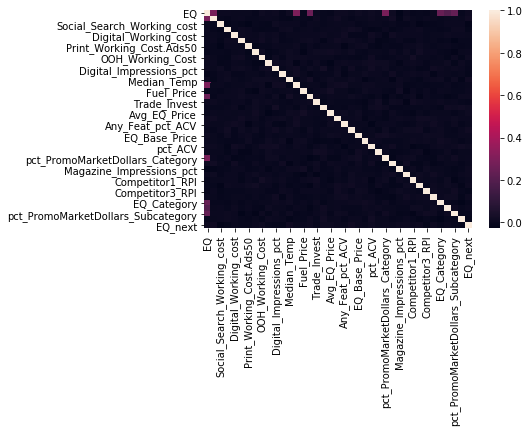

In [6]:
data_corr = train_data.drop(['Day'], axis=1)
corr = data_corr.corr()
sns.heatmap(corr)

Seems like there is little no correlation between them.

### 2. Manual feature selection/extraction
Some features like rainfall, temperature don't affect sales a lot, they can be removed. 

In [7]:
train_data = train_data.drop(['Median_Rainfall', 'Median_Temp'], axis=1)


We can create a new feature Avg_Comp_per which is the average relative performance of all 4 competitors

In [8]:
def add_price_diff_feature(df):
    df['Avg_Comp_Per'] = (df['Competitor1_RPI']+df['Competitor2_RPI']+df['Competitor3_RPI']+df['Competitor4_RPI'])/4
    return df
train_data = add_price_diff_feature(train_data)    
train_data.head()

,Day,EQ,Social_Search_Impressions,Social_Search_Working_cost,Digital_Impressions,Digital_Working_cost,Print_Impressions.Ads40,Print_Working_Cost.Ads50,OOH_Impressions,OOH_Working_Cost,...,Competitor1_RPI,Competitor2_RPI,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,RPI_Subcategory,EQ_next,Avg_Comp_Per
1,2,25.521137,4239408,105695,5844288,188902,264008,113582,284597324,1719318,...,111.79,43.31,47.58,67.90,12155631,371540,0.2515,35.02,718.458667,67.6450
2,3,268.288044,6708500,87686,13008485,19704,150505,38501,807781054,1569740,...,110.15,38.26,49.26,72.70,11939870,225984,0.3679,46.22,25.521137,67.5925
3,4,209.071599,36835247,70791,2520814,200111,253458,53719,667441334,922723,...,116.74,39.37,44.21,73.01,7045541,551342,0.0504,38.10,268.288044,68.3325
4,5,3482.169185,23693467,75610,9276779,65532,278877,95178,74045467,1834970,...,115.18,36.85,45.46,75.84,11488805,254143,0.2219,39.16,209.071599,68.3325
5,6,55.181083,13925382,114740,2733356,264751,112292,145635,88407557,2864910,...,118.39,35.87,42.90,66.35,7909917,307429,0.1996,39.26,3482.169185,65.8775


In [9]:
from sklearn.linear_model import BayesianRidge

data_x = train_data.drop(['Day', 'EQ_next'], axis=1)
data_y = train_data['EQ_next']

print(len(data_x.columns))
model = BayesianRidge(lambda_2=1e10)
model.fit(data_x, data_y)


37


BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=10000000000.0, lambda_init=None,
              n_iter=300, normalize=False, tol=0.001, verbose=False)

In [10]:
# Function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

test_data = transform_ts_supervised(test_data_org)
test_data = test_data.drop(['Median_Rainfall', 'Median_Temp'], axis=1)

test_data = add_price_diff_feature(test_data)

test_data_x = test_data.drop(['EQ_next', 'Period'], axis=1)
test_data_y = test_data['EQ_next'].values
predictions = model.predict(test_data_x)
te = mean_absolute_percentage_error(test_data_y, predictions)
print('Mean absolute percentage error: {}%'.format(te))
pred = np.array(predictions)
print(pred)
print(np.array(test_data_y))

Mean absolute percentage error: 115.64623702700503%
[569.38457148 641.51894388 692.27397763 543.82658857 689.37128931
 602.12061722 803.97427584 596.64018412 710.08272382 540.80373371
 634.0531106  677.37657676 844.77106941 775.90702508 856.16712402
 425.37143005 186.26772998 -15.27806131 104.96431625 473.46556839
 647.00619954 668.35550006 798.68108485 717.97579659 578.48023989
 675.37917479 696.18085752 630.55322021 684.09035366 705.7113558
 658.09682851 365.29168307 172.57808448  36.16796015 386.12423551
 584.51070815 587.44219609 408.19105168]
[504.7849334 490.2264774 479.2446856 489.0574275 477.0319938 487.8552994
 466.3992813 546.0530843 464.9256065 357.6486931 298.553287  283.7974301
 239.2316222 392.3264313 355.6522644 286.705586  361.4447145 378.2739106
 300.9220559 367.5470472 385.53789   332.1503773 237.7135844 193.3007544
 179.2925035 173.2373049 247.3154761 284.1832918 274.4307568 205.4999844
 250.555064  278.3175236 284.8954797 244.9313589 175.4323186 168.1066651
 161.529

## Machine learning approach

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR, LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold

models = [LinearRegression(), SVR(), RandomForestRegressor()]
for m in models:
    score = 0
    folds=4
    kf = KFold(n_splits=folds)
    for train_index, test_index in kf.split(data_x):
        X_train, X_test = data_x.iloc[train_index], data_x.iloc[test_index]
        y_train, y_test = data_y.iloc[train_index], data_y.iloc[test_index]
        m.fit(X_train, y_train)
        pred = m.predict(X_test)
        te = mean_absolute_percentage_error(y_test, pred)
        score+=te
    
    print('Model name: {}, CV Mean absolute percentage error: {}%'.format(type(m).__name__,score/folds))

Model name: LinearRegression, CV Mean absolute percentage error: 2985.5549259472346%
Model name: SVR, CV Mean absolute percentage error: 965.2153840365361%
Model name: RandomForestRegressor, CV Mean absolute percentage error: 3455.8651202031724%


Support Vector Machines seem to be pretty good in crossvalidation. Lets train a SVR on the full dataset

In [12]:
model = SVR(C=5e2)
model.fit(data_x, data_y)
pred_test = model.predict(test_data_x)
pred_train = model.predict(data_x)
test_error = mean_absolute_percentage_error(test_data_y, pred_test)
train_error = mean_absolute_percentage_error(data_y, pred_train)
print('Train Mean absolute percentage error: {}%'.format(train_error))
print('Test Mean absolute percentage error: {}%'.format(test_error))

Train Mean absolute percentage error: 946.2016769326146%
Test Mean absolute percentage error: 30.204506282103498%


## Forecasting approach

We have already established that the data has no autocorrelation and the data is stationary, we can fit a ARIMAX model without any need for differencing.

Since we are forecasting, there is no question of train or test sets, buts lets fit the algorithm on both sets anyway.

In [13]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
train_data = train_data_org.dropna()

data_x = train_data.drop(['Median_Rainfall', 'Median_Temp', 'Day', 'EQ'], axis=1)
data_x = add_price_diff_feature(data_x)    
data_y = train_data['EQ']


arimax = SARIMAX(data_y, exog=data_x,
                                   enforce_invertibility=False, enforce_stationarity=False,
                                   order=(2,0,0)).fit()
print(arimax.summary())

/home/aftaab/miniconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/aftaab/miniconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/aftaab/miniconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                               SARIMAX Results                                
Dep. Variable:                     EQ   No. Observations:                11999
Model:               SARIMAX(2, 0, 0)   Log Likelihood              -99098.229
Date:                Mon, 30 Mar 2020   AIC                         198276.457
Time:                        23:24:31   BIC                         198572.154
Sample:                             0   HQIC                        198375.649
                              - 11999                                         
Covariance Type:                  opg                                         
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Social_Search_Impressions           3.205e-05   9.59e-07     33.426      0.000    3.02e-05    3.39e-05
Social_Search_Working_cost             0.0001      0.000   

Lets predict on the train dataset and test sets as well.

train Mean absolute percentage error: 4027.1798784088496%
test Mean absolute percentage error: 15.69285092931084%


/home/aftaab/miniconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/aftaab/miniconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


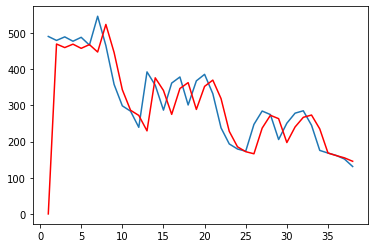

In [14]:
preds = arimax.predict()
train_error=mean_absolute_percentage_error(data_y, preds)
print('train Mean absolute percentage error: {}%'.format(train_error))

test_data = test_data_org.dropna()

data_x = test_data.drop(['Median_Rainfall', 'Median_Temp', 'Period', 'EQ'], axis=1)
data_x = add_price_diff_feature(data_x)    
data_y = test_data['EQ']

arimax = SARIMAX(data_y, enforce_invertibility=False, enforce_stationarity=False,
                                   order=(2,0,0)).fit()

preds = arimax.predict()
test_error=mean_absolute_percentage_error(data_y, preds)
print('test Mean absolute percentage error: {}%'.format(test_error))


plt.plot(data_y)
plt.plot(preds, color='red')
plt.show()

Forecasting gives the best test set MAPE by far. Train MAPE is quite large though, but the train set has a large number of outliers which are skewing up the error. Thus this model is the best one so far.

Using this model, we can forecast the next 6 periods

In [15]:
# Next 6 values after last test set period.
future = arimax.forecast(steps=6)
print(future)

38    125.571125
39    120.403684
40    115.448923
41    110.698057
42    106.142695
43    101.774791
dtype: float64


/home/aftaab/miniconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


### Determining most important factors which affect sales
Since our forecasting approach can't give us feature importance, we can use one of the machine learning models we made earlier for this purpose(However even though the SVM did best, it cant be used as it used a Gaussian kernel, which makes measuring feature importance impossible). Linear Regression actually did better than Random forests in CV, so lets use that

In [26]:
model = LinearRegression()
train_data = transform_ts_supervised(train_data_org)
data_x = train_data.drop(['Day', 'EQ_next'], axis=1)
data_y = train_data['EQ_next']
model.fit(data_x, data_y)

coefficients = pd.concat([pd.DataFrame(data_x.columns),pd.DataFrame(np.transpose(model.coef_))], axis = 1)
coefficients.columns=['Feature', 'Importance']
coefficients=coefficients.sort_values(by='Importance', ascending=False)

# Showing top 5
coefficients.iloc[:6]

,Feature,Importance
15,Inflation,197.208069
22,EQ_Base_Price,82.370652
17,Brand_Equity,32.461425
26,pct_PromoMarketDollars_Category,25.480948
21,Any_Disp_pct_ACV,15.741972
14,Fuel_Price,3.958786
